In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import pylab as pl
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc,confusion_matrix
from sklearn import metrics
from sklearn import svm, datasets
from scipy import interp
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
def plot_learning_curve(estimator, title, X, Y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, Y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    print(train_scores_mean)
    train_scores_std = np.std(train_scores, axis=1)
    print(train_scores_std)
    test_scores_mean = np.mean(test_scores, axis=1)
    print(test_scores_mean)
    test_scores_std = np.std(test_scores, axis=1)
    print(test_scores_std)
    fit_times_mean = np.mean(fit_times, axis=1)
    print(fit_times_mean)
    fit_times_std = np.std(fit_times, axis=1)
    print(fit_times_std)
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [3]:
DIRECTORY = r'D:\CLASS\Sem4\Machine Learning Lab\new dataset'
CATEGORIES = ['0-3','3-13','13 and above'] 

In [4]:
data=[]

for category in CATEGORIES:
    path = os.path.join(DIRECTORY,category)
    label = CATEGORIES.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        img_arr = cv2.imread(imgpath,0)
        img_arr = cv2.resize(img_arr,(200,200))
        img_arr = np.array(img_arr).flatten()
        data.append([img_arr,label])

In [5]:
random.shuffle(data)
len(data)

509

In [6]:
X=[]
Y=[]

for feature,lbl in data:
    X.append(feature)
    Y.append(lbl)


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [8]:
param_grid = {'C': [0.1,1,5,10,100], 'gamma': [0.1,0.01,0.001,1,'auto'],'kernel': ['poly','linear'],
              'probability':[True]}

In [9]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ....C=0.1, gamma=0.1, kernel=poly, probability=True; total time=  14.9s
[CV] END ....C=0.1, gamma=0.1, kernel=poly, probability=True; total time=  14.9s
[CV] END ....C=0.1, gamma=0.1, kernel=poly, probability=True; total time=  15.0s
[CV] END ....C=0.1, gamma=0.1, kernel=poly, probability=True; total time=  14.3s
[CV] END ....C=0.1, gamma=0.1, kernel=poly, probability=True; total time=  14.6s
[CV] END ..C=0.1, gamma=0.1, kernel=linear, probability=True; total time=  15.0s
[CV] END ..C=0.1, gamma=0.1, kernel=linear, probability=True; total time=  14.9s
[CV] END ..C=0.1, gamma=0.1, kernel=linear, probability=True; total time=  15.3s
[CV] END ..C=0.1, gamma=0.1, kernel=linear, probability=True; total time=  14.9s
[CV] END ..C=0.1, gamma=0.1, kernel=linear, probability=True; total time=  15.0s
[CV] END ...C=0.1, gamma=0.01, kernel=poly, probability=True; total time=  14.2s
[CV] END ...C=0.1, gamma=0.01, kernel=poly, pro

[CV] END ......C=5, gamma=0.1, kernel=poly, probability=True; total time=  14.4s
[CV] END ......C=5, gamma=0.1, kernel=poly, probability=True; total time=  14.2s
[CV] END ......C=5, gamma=0.1, kernel=poly, probability=True; total time=  13.9s
[CV] END ......C=5, gamma=0.1, kernel=poly, probability=True; total time=  14.4s
[CV] END ....C=5, gamma=0.1, kernel=linear, probability=True; total time=  16.8s
[CV] END ....C=5, gamma=0.1, kernel=linear, probability=True; total time=  15.6s
[CV] END ....C=5, gamma=0.1, kernel=linear, probability=True; total time=  15.2s
[CV] END ....C=5, gamma=0.1, kernel=linear, probability=True; total time=  15.7s
[CV] END ....C=5, gamma=0.1, kernel=linear, probability=True; total time=  15.0s
[CV] END .....C=5, gamma=0.01, kernel=poly, probability=True; total time=  14.9s
[CV] END .....C=5, gamma=0.01, kernel=poly, probability=True; total time=  15.6s
[CV] END .....C=5, gamma=0.01, kernel=poly, probability=True; total time=  16.5s
[CV] END .....C=5, gamma=0.0

[CV] END ....C=100, gamma=0.1, kernel=poly, probability=True; total time=  13.1s
[CV] END ....C=100, gamma=0.1, kernel=poly, probability=True; total time=  13.3s
[CV] END ..C=100, gamma=0.1, kernel=linear, probability=True; total time=  15.6s
[CV] END ..C=100, gamma=0.1, kernel=linear, probability=True; total time=  15.0s
[CV] END ..C=100, gamma=0.1, kernel=linear, probability=True; total time=  15.0s
[CV] END ..C=100, gamma=0.1, kernel=linear, probability=True; total time=  13.5s
[CV] END ..C=100, gamma=0.1, kernel=linear, probability=True; total time=  14.4s
[CV] END ...C=100, gamma=0.01, kernel=poly, probability=True; total time=  13.2s
[CV] END ...C=100, gamma=0.01, kernel=poly, probability=True; total time=  12.7s
[CV] END ...C=100, gamma=0.01, kernel=poly, probability=True; total time=  12.8s
[CV] END ...C=100, gamma=0.01, kernel=poly, probability=True; total time=  12.6s
[CV] END ...C=100, gamma=0.01, kernel=poly, probability=True; total time=  13.2s
[CV] END .C=100, gamma=0.01,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 1, 'auto'],
                         'kernel': ['poly', 'linear'], 'probability': [True]},
             verbose=2)

In [10]:
model=grid.best_estimator_

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]
[0.44411765 0.54901961 0.57352941 0.57843137 0.60392157]
[0.05352798 0.04250879 0.04188237 0.04112976 0.04232752]
[ 0.98415027  9.98467996 27.56250358 52.34296575 82.03737054]
[ 0.20115723  0.31800352  0.59613731  3.87172887 11.76700531]


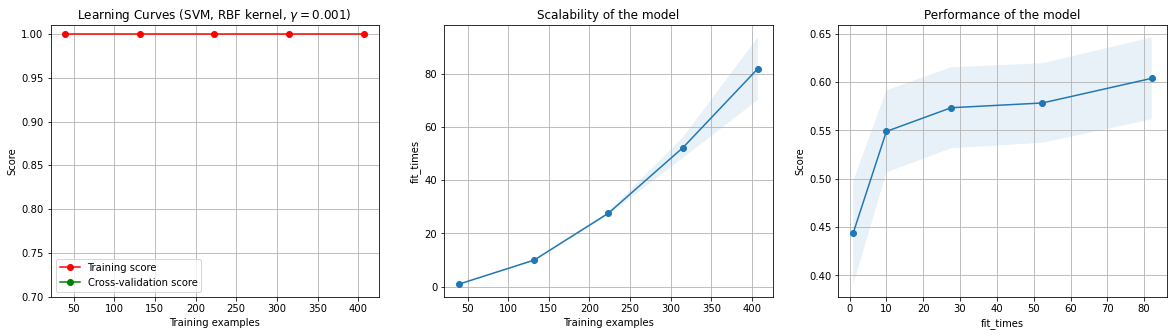

In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model, title, X, Y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [14]:
prediction = model.predict(X_test)
accuracy = model.score(X_test,Y_test)
Y_pred = np.around(prediction)
print("Accuracy: ",accuracy)
Y_prob = model.predict_proba(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy)

Accuracy:  0.6233766233766234
Accuracy:  0.6233766233766234


Prediction:  3-13
Actually:   13 and above


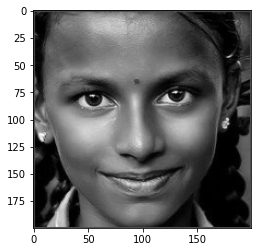

In [15]:
print("Prediction: ",CATEGORIES[prediction[-1]])
print("Actually:  ",CATEGORIES[Y_test[-1]])
imag = X_test[-1].reshape(200,200)
plt.imshow(imag,cmap="gray")
plt.show()

In [16]:
matrix = confusion_matrix(Y_test,Y_pred)
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[13 12  1]
 [ 5 17  5]
 [ 3  3 18]]


In [17]:
fpr1, tpr1, thresh1 = roc_curve(Y_test, Y_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [18]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])


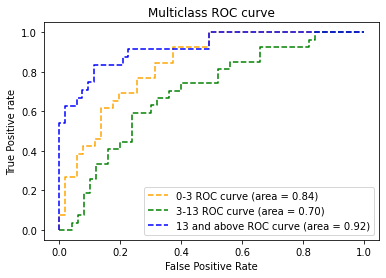

In [19]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='0-3 ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='3-13 ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='13 and above ROC curve (area = %0.2f)' % roc_auc[2])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)

In [20]:
print(metrics.classification_report(Y_test, Y_pred, target_names = ['0-3 (Class 0)','3-13 (Class 1)','13 and above (Class 2)']))

                        precision    recall  f1-score   support

         0-3 (Class 0)       0.62      0.50      0.55        26
        3-13 (Class 1)       0.53      0.63      0.58        27
13 and above (Class 2)       0.75      0.75      0.75        24

              accuracy                           0.62        77
             macro avg       0.63      0.63      0.63        77
          weighted avg       0.63      0.62      0.62        77



In [21]:
train_sizes,train_scores,test_scores=learning_curve(model,X,Y,cv=10,scoring='accuracy',train_sizes=np.linspace(0.01,1,50),verbose=1)

[learning_curve] Training set sizes: [  4  13  23  32  41  50  60  69  78  87  97 106 115 124 134 143 152 161
 171 180 189 198 208 217 226 235 245 254 263 272 282 291 300 309 319 328
 337 346 356 365 374 383 393 402 411 420 430 439 448 458]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 85.2min finished


In [22]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

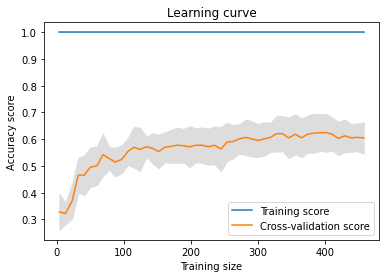

In [23]:
plt.plot(train_sizes,train_mean,label="Training score")
plt.plot(train_sizes,test_mean,label="Cross-validation score")

plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std,color='#DDDDDD')
plt.title('Learning curve')
plt.xlabel('Training size')
plt.ylabel('Accuracy score')
plt.legend(loc="best")